1. Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset

Reference
https://inside-machinelearning.com/en/how-to-do-linear-regression-with-keras/

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

In [2]:
data=pd.read_csv("Boston.csv")
data

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
data.dtypes

Unnamed: 0      int64
crim          float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
age           float64
dis           float64
rad             int64
tax             int64
ptratio       float64
black         float64
lstat         float64
medv          float64
dtype: object

In [38]:
data.corr()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


In [4]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(15, 15)

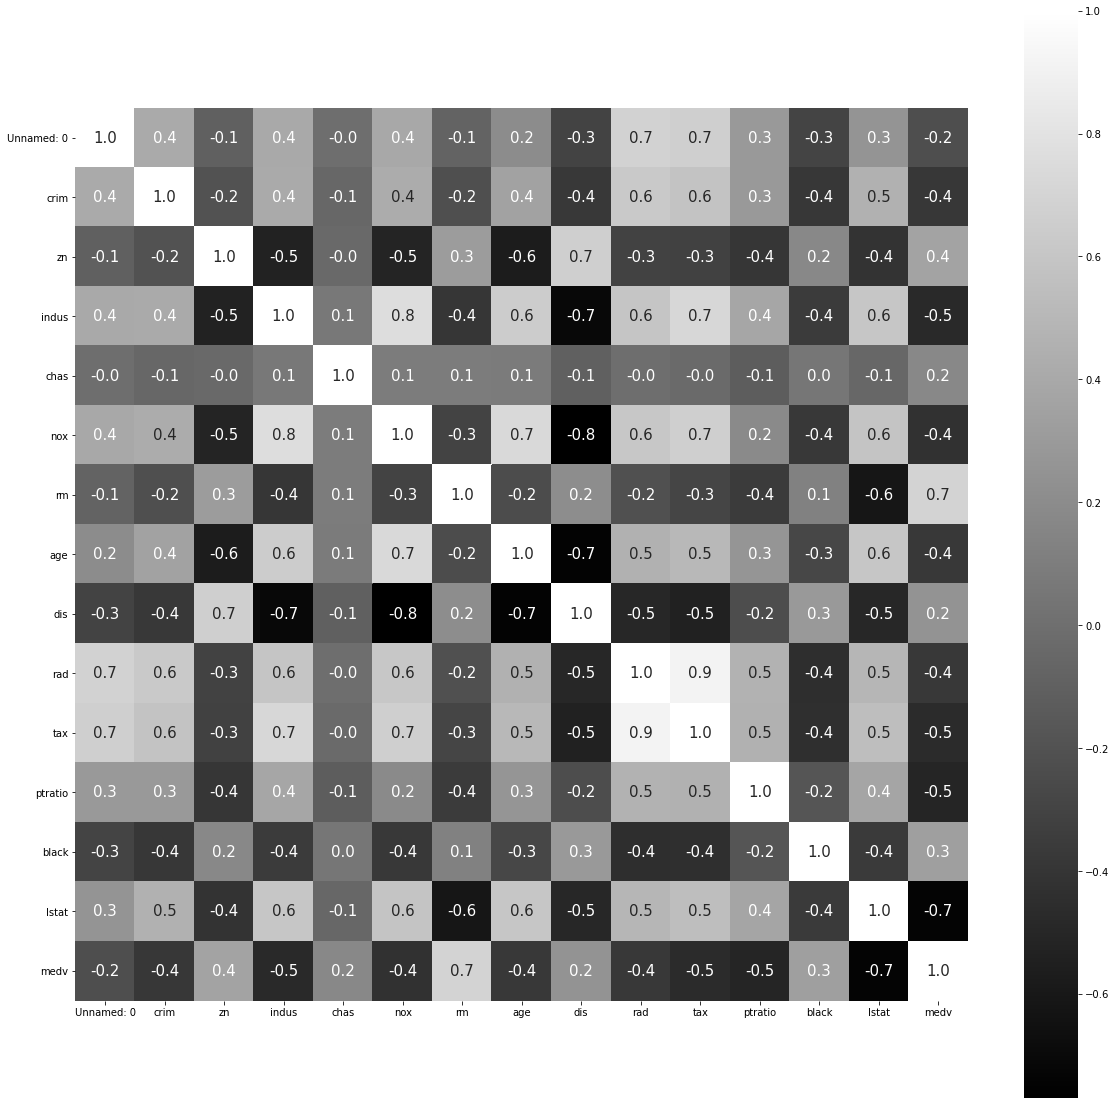

In [5]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='gray')

In [6]:
X =data.drop(['medv'], axis = 1)# data['area']#
y = data['medv']

In [7]:
X

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [8]:
X.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat'],
      dtype='object')

In [9]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [10]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [11]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [12]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate the scaler and fit to training dataset, X_train
scaler = MinMaxScaler()
scaler.fit(X_train)

# Replace unscaled values with scaled values
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [14]:
model = Sequential()
model.add(Dense(64, input_dim =14, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(54, activation = 'relu'))
model.add(Dropout(0.18))
model.add(Dense(1))

In [15]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])

In [16]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200)

Epoch 1/200
9/9 [==============================] - 3s 53ms/step - loss: 545.0709 - mse: 545.0709 - mae: 21.6854 - val_loss: 553.7529 - val_mse: 553.7529 - val_mae: 21.7713
Epoch 2/200
9/9 [==============================] - 0s 12ms/step - loss: 504.6282 - mse: 504.6282 - mae: 20.7199 - val_loss: 503.4345 - val_mse: 503.4345 - val_mae: 20.5705
Epoch 3/200
9/9 [==============================] - 0s 11ms/step - loss: 442.5716 - mse: 442.5716 - mae: 19.1068 - val_loss: 416.7231 - val_mse: 416.7231 - val_mae: 18.2958
Epoch 4/200
9/9 [==============================] - 0s 11ms/step - loss: 335.6369 - mse: 335.6369 - mae: 15.8524 - val_loss: 266.8848 - val_mse: 266.8848 - val_mae: 13.7713
Epoch 5/200
9/9 [==============================] - 0s 13ms/step - loss: 182.6868 - mse: 182.6868 - mae: 10.7581 - val_loss: 114.2326 - val_mse: 114.2326 - val_mae: 8.2423
Epoch 6/200
9/9 [==============================] - 0s 14ms/step - loss: 140.3240 - mse: 140.3240 - mae: 9.0485 - val_loss: 98.3706 - val_mse:

Epoch 50/200
9/9 [==============================] - 0s 12ms/step - loss: 31.9255 - mse: 31.9255 - mae: 4.1141 - val_loss: 32.3361 - val_mse: 32.3361 - val_mae: 3.3486
Epoch 51/200
9/9 [==============================] - 0s 11ms/step - loss: 27.3720 - mse: 27.3720 - mae: 3.9340 - val_loss: 27.6521 - val_mse: 27.6521 - val_mae: 3.4831
Epoch 52/200
9/9 [==============================] - 0s 11ms/step - loss: 32.0127 - mse: 32.0127 - mae: 4.2786 - val_loss: 33.2187 - val_mse: 33.2187 - val_mae: 3.4439
Epoch 53/200
9/9 [==============================] - 0s 12ms/step - loss: 29.6535 - mse: 29.6535 - mae: 3.9919 - val_loss: 27.3903 - val_mse: 27.3903 - val_mae: 3.2223
Epoch 54/200
9/9 [==============================] - 0s 12ms/step - loss: 31.5056 - mse: 31.5056 - mae: 4.2462 - val_loss: 27.1177 - val_mse: 27.1177 - val_mae: 3.1866
Epoch 55/200
9/9 [==============================] - 0s 10ms/step - loss: 30.2960 - mse: 30.2960 - mae: 4.0461 - val_loss: 26.8471 - val_mse: 26.8471 - val_mae: 3.173

9/9 [==============================] - 0s 11ms/step - loss: 24.1348 - mse: 24.1348 - mae: 3.5497 - val_loss: 19.9709 - val_mse: 19.9709 - val_mae: 2.8656
Epoch 100/200
9/9 [==============================] - 0s 12ms/step - loss: 22.3838 - mse: 22.3838 - mae: 3.4638 - val_loss: 21.8371 - val_mse: 21.8371 - val_mae: 2.7591
Epoch 101/200
9/9 [==============================] - 0s 12ms/step - loss: 21.7487 - mse: 21.7487 - mae: 3.5317 - val_loss: 20.4038 - val_mse: 20.4038 - val_mae: 2.6985
Epoch 102/200
9/9 [==============================] - 0s 12ms/step - loss: 20.9686 - mse: 20.9686 - mae: 3.5755 - val_loss: 21.1391 - val_mse: 21.1391 - val_mae: 2.7349
Epoch 103/200
9/9 [==============================] - 0s 11ms/step - loss: 23.9031 - mse: 23.9031 - mae: 3.6677 - val_loss: 23.5542 - val_mse: 23.5542 - val_mae: 2.8692
Epoch 104/200
9/9 [==============================] - 0s 9ms/step - loss: 19.8706 - mse: 19.8706 - mae: 3.3847 - val_loss: 21.8758 - val_mse: 21.8758 - val_mae: 2.7843
Epoch 1

Epoch 148/200
9/9 [==============================] - 0s 12ms/step - loss: 19.5777 - mse: 19.5777 - mae: 3.3441 - val_loss: 17.6717 - val_mse: 17.6717 - val_mae: 2.5003
Epoch 149/200
9/9 [==============================] - 0s 12ms/step - loss: 18.7917 - mse: 18.7917 - mae: 3.1336 - val_loss: 17.9573 - val_mse: 17.9573 - val_mae: 2.5434
Epoch 150/200
9/9 [==============================] - 0s 11ms/step - loss: 19.9019 - mse: 19.9019 - mae: 3.2807 - val_loss: 22.3666 - val_mse: 22.3666 - val_mae: 2.9386
Epoch 151/200
9/9 [==============================] - 0s 12ms/step - loss: 20.7560 - mse: 20.7560 - mae: 3.4281 - val_loss: 17.2280 - val_mse: 17.2280 - val_mae: 2.5686
Epoch 152/200
9/9 [==============================] - 0s 11ms/step - loss: 19.8392 - mse: 19.8392 - mae: 3.3190 - val_loss: 24.8055 - val_mse: 24.8055 - val_mae: 3.1353
Epoch 153/200
9/9 [==============================] - 0s 12ms/step - loss: 22.9202 - mse: 22.9202 - mae: 3.5385 - val_loss: 17.5325 - val_mse: 17.5325 - val_mae:

Epoch 197/200
9/9 [==============================] - 0s 14ms/step - loss: 15.1934 - mse: 15.1934 - mae: 2.9793 - val_loss: 16.9165 - val_mse: 16.9165 - val_mae: 2.2907
Epoch 198/200
9/9 [==============================] - 0s 13ms/step - loss: 18.1487 - mse: 18.1487 - mae: 3.1001 - val_loss: 17.2715 - val_mse: 17.2715 - val_mae: 2.3214
Epoch 199/200
9/9 [==============================] - 0s 11ms/step - loss: 17.6499 - mse: 17.6499 - mae: 3.1633 - val_loss: 22.5181 - val_mse: 22.5181 - val_mae: 2.8699
Epoch 200/200
9/9 [==============================] - 0s 15ms/step - loss: 16.2433 - mse: 16.2433 - mae: 2.9225 - val_loss: 17.4295 - val_mse: 17.4295 - val_mae: 2.5809


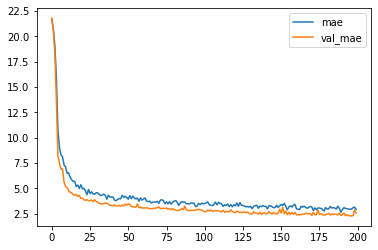

In [17]:
import matplotlib.pyplot as plt

#plot the loss and validation loss of the dataset
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')

plt.legend()

In [18]:
scores = model.evaluate(X_test, y_test, verbose = 0)

print('Mean Squared Error : ', scores[1])
print('Mean Absolute Error : ', scores[2])

Mean Squared Error :  18.3035831451416
Mean Absolute Error :  2.734307050704956


In [19]:
Y_pred = model.predict(X_test)
Y_pred

5/5 [==============================] - 0s 5ms/step


array([[16.70658 ],
       [25.211918],
       [18.766266],
       [18.645222],
       [42.972736],
       [26.46051 ],
       [32.061295],
       [19.841269],
       [16.104681],
       [17.471952],
       [27.471779],
       [26.66733 ],
       [20.026455],
       [35.00312 ],
       [20.598871],
       [12.430586],
       [20.349047],
       [12.112443],
       [12.493962],
       [16.076218],
       [ 8.784686],
       [17.140806],
       [20.618326],
       [21.37353 ],
       [19.735468],
       [20.283398],
       [18.535635],
       [16.880154],
       [24.390337],
       [19.216318],
       [12.141918],
       [23.592415],
       [33.703568],
       [23.095839],
       [16.936846],
       [16.710876],
       [32.676643],
       [46.25301 ],
       [23.799809],
       [25.078192],
       [40.863285],
       [34.581165],
       [16.950521],
       [32.15462 ],
       [30.54239 ],
       [23.371035],
       [47.064453],
       [19.586296],
       [19.509525],
       [22.594315],


In [20]:
from sklearn.metrics import r2_score

print('r2 score: ', r2_score(y_test,Y_pred))

r2 score:  0.8247119933730437


5/5 [==============================] - 0s 0s/step


[]

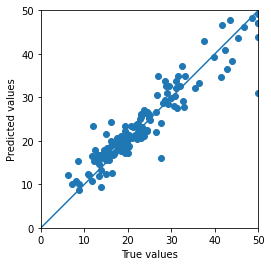

In [21]:
Y_pred = model.predict(X_test)

a = plt.axes(aspect='equal')

plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.plot([0, 50], [0,50])
plt.scatter(y_test,Y_pred)
plt.plot()

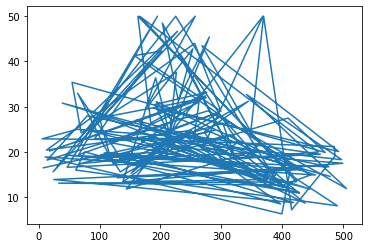

In [22]:
plt.plot(y_test)


array([[16.70658 ],
       [25.211918],
       [18.766266],
       [18.645222],
       [42.972736],
       [26.46051 ],
       [32.061295],
       [19.841269],
       [16.104681],
       [17.471952],
       [27.471779],
       [26.66733 ],
       [20.026455],
       [35.00312 ],
       [20.598871],
       [12.430586],
       [20.349047],
       [12.112443],
       [12.493962],
       [16.076218],
       [ 8.784686],
       [17.140806],
       [20.618326],
       [21.37353 ],
       [19.735468],
       [20.283398],
       [18.535635],
       [16.880154],
       [24.390337],
       [19.216318],
       [12.141918],
       [23.592415],
       [33.703568],
       [23.095839],
       [16.936846],
       [16.710876],
       [32.676643],
       [46.25301 ],
       [23.799809],
       [25.078192],
       [40.863285],
       [34.581165],
       [16.950521],
       [32.15462 ],
       [30.54239 ],
       [23.371035],
       [47.064453],
       [19.586296],
       [19.509525],
       [22.594315],


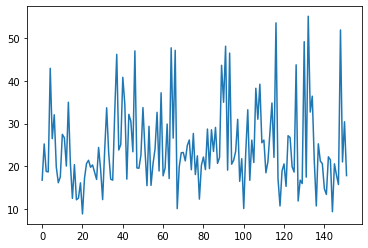

In [23]:
plt.plot(Y_pred)
Y_pred

In [24]:
print(Y_pred[:5])
print(y_test[:5])
y_test.head()

[[16.70658 ]
 [25.211918]
 [18.766266]
 [18.645222]
 [42.972736]]
8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
Name: medv, dtype: float64


8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
Name: medv, dtype: float64

Using ML MODEL lm for Linear Regression

In [25]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

In [26]:
# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
# Value of y intercept
lm.intercept_

27.637914578957268

In [28]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,Unnamed: 0,-1.12059
1,crim,-10.9793
2,zn,5.75019
3,indus,-0.234247
4,chas,4.68369
5,nox,-6.86576
6,rm,16.0633
7,age,-0.569172
8,dis,-17.1983
9,rad,7.91933


In [29]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [30]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7472849101482609
Adjusted R^2: 0.7368482987679531
MAE: 3.0799724688246988
MSE: 19.022074481402168
RMSE: 4.36143032518028


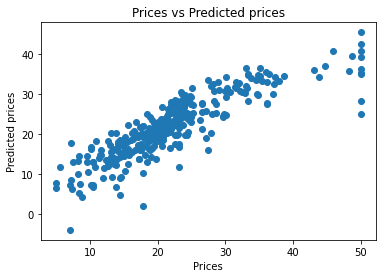

In [31]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

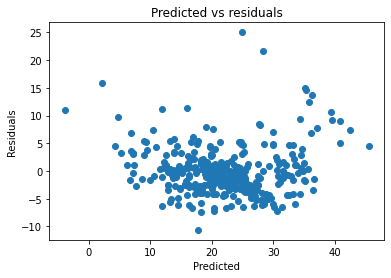

In [32]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

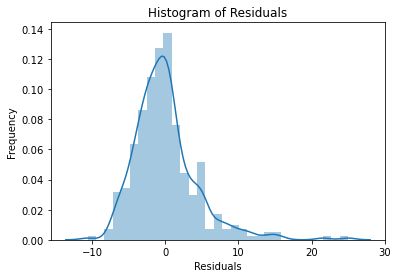

In [33]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [34]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [35]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7134033837044162
Adjusted R^2: 0.6841161382435537
MAE: 3.8549920587264106
MSE: 29.9264393893202
RMSE: 5.470506319283454


[]

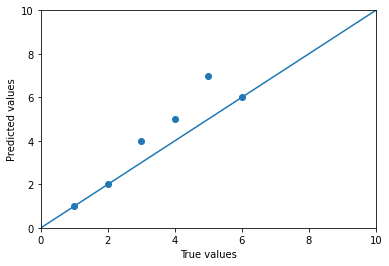

In [36]:
x1=[1,2,3,4,5,6]
y1=[1,2,4,5,7,6]
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0,10])
plt.ylim([0,10])
plt.plot([0, 10], [0,10])
plt.scatter(x1,y1)
plt.plot()